<img src="../dataset_research_paper_docs/transformer_archi.png" alt="transformer" width="600" style="display:block; margin:auto;">


In [19]:
import torch

In [20]:
[45, 51, 49, 50, 36]

[45, 51, 49, 50, 36]

In [24]:
a=torch.tensor([[45, 51, 49, 50, 36]],dtype=torch.long)

In [25]:
a.shape

torch.Size([1, 5])

In [23]:
b=torch.tensor(torch.zeros((1,1),dtype=torch.long))
print(b)
print(b.shape)

tensor([[0]])
torch.Size([1, 1])


/var/folders/49/2yb8tvwd13q0h205019lpz540000gn/T/ipykernel_32237/4163618824.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  b=torch.tensor(torch.zeros((1,1),dtype=torch.long))


# Char level


based on the dataset of sheskphreare's works , the goal is to build a character level language model using transformer architecture.

- given a sequence of characters , the model will predict the next character in the sequence.
- `Goal`: imitate the style of sheskphreare's writing.

- character level encoding

## components used

-


-------

# Trained on Narayan Gopal dataset

In [16]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.nn import functional as F

torch.manual_seed(1337)

In [2]:
with open("../dataset_research_paper_docs/nepalidata.txt", "r", encoding="utf-8") as f:
    text = f.read()

In [3]:
len(text)

6081

In [4]:
print(text[:500])

चिनारी हाम्रो धेरै पुरानो:
चिनारी हाम्रो, धेरै पुरानो रहेझै लाग्दछ।
नदेखे पनि भेट सधै-सधै, भएझै लाग्दछ।

शीतल दिन्छौ, पवन भएर, मिर्मिरे याममा
मायालु न्यानो स्पर्ष दिन्छौ, किरणको रूपमा।
झनझनै बस्छ, संगीत तिम्रो, हरेक तन्तुमा।
आशाको दियो आफै नै बल्छ, अँध्यारो कुनामा।

हजार खोजे, त्यो रुप हेर्न, पाउदै पाईन।
मायाले छुने, हाथ छाम्न खोजे, समाउनै सकिन।
भनिदेउ आज, को हौ तिमी, मैले त जानिन।
विरंगी रुप, फेरेर आउने, तिमीलाई चिनिन।

चुमेर पाना भरि :
चुमेर पाना भरि यति म लेखि दिन्छु
प्रितिका बाचाहरु जाने जति


In [5]:
chars = set(text)
print(len(chars))
print(chars, sep="")

64
{'थ', 'ा', 'ं', 'ह', 'ँ', '(', 'व', 'स', 'य', 'ऊ', 'ृ', 'ी', 'ढ', '\u2005', 'ड़', '.', ' ', 'घ', 'फ', 'भ', '-', 'ौ', 'ु', '\n', 'ठ', 'ध', ')', 'प', 'च', 'ए', 'े', 'त', 'ब', 'अ', 'ि', 'ग', 'ष', ':', 'ै', 'छ', 'श', '।', 'ो', 'उ', 'न', '्', 'ल', 'ड', 'ट', 'द', ',', 'झ', 'क', 'ङ', 'म', 'ू', 'ज', 'ण', 'ई', 'इ', 'र', 'आ', 'ख', '\xa0'}


In [6]:
chars = list(set(text))
chars[:10]

['थ', 'ा', 'ं', 'ह', 'ँ', '(', 'व', 'स', 'य', 'ऊ']

---


In [7]:
chars = sorted(list(set(text)))
vocab_size = len(chars)
print("".join(chars))
print(vocab_size)


 (),-.: ँंअआइईउऊएकखगघङचछजझटठडढणतथदधनपफबभमयरलवशषसहािीुूृेैोौ्ड़। 
64


## `create` a mapping table for string to integer


In [8]:
strtoint = {ch: i for i, ch in enumerate(chars)}
inttostr = {i: ch for i, ch in enumerate(chars)}

encode_txt = lambda s: [strtoint[c] for c in s]
# returns list of integer for input string given

decode_txt = lambda l: "".join(inttostr[i] for i in l)
# returns string from given integers

In [9]:
list(strtoint.items())[:10]  # lookuptable

[('\n', 0),
 (' ', 1),
 ('(', 2),
 (')', 3),
 (',', 4),
 ('-', 5),
 ('.', 6),
 (':', 7),
 ('\xa0', 8),
 ('ँ', 9)]

In [10]:
list(strtoint.items())[-10:]  # lookuptable

[('ू', 54),
 ('ृ', 55),
 ('े', 56),
 ('ै', 57),
 ('ो', 58),
 ('ौ', 59),
 ('्', 60),
 ('ड़', 61),
 ('।', 62),
 ('\u2005', 63)]

In [11]:
list(inttostr.items())[-10:]  # lookuptable

[(54, 'ू'),
 (55, 'ृ'),
 (56, 'े'),
 (57, 'ै'),
 (58, 'ो'),
 (59, 'ौ'),
 (60, '्'),
 (61, 'ड़'),
 (62, '।'),
 (63, '\u2005')]

---


Character level token


In [12]:
encode_txt(" अँध्यारो कुनामा ")

[1, 11, 9, 35, 60, 42, 50, 43, 58, 1, 18, 53, 36, 50, 41, 50, 1]

In [13]:
decode_txt([1, 13, 11, 37, 62, 44, 52, 45, 60, 1, 20, 55, 38, 52, 43, 52, 1])

' इअप।लीव् गृफीरी '

In [14]:
print(encode_txt("नमस्ते साथीहरू, के छ हालखबर"))

enc_text = encode_txt("नमस्ते साथीहरू, के छ हालखबर")

print(decode_txt(enc_text))

[36, 41, 48, 60, 32, 56, 1, 48, 50, 33, 52, 49, 43, 54, 4, 1, 18, 56, 1, 24, 1, 49, 50, 44, 19, 39, 43]
नमस्ते साथीहरू, के छ हालखबर


In [15]:
print(encode_txt("विहान"))

enc_text = encode_txt("विहान")

print(decode_txt(enc_text))

[45, 51, 49, 50, 36]
विहान


# Google uses [sentencepiece](https://github.com/google/sentencepiece) for tokenization.

SentencePiece is an unsupervised text tokenizer and detokenizer mainly for Neural Network-based text generation systems where the vocabulary size is predetermined prior to the neural model training. SentencePiece implements subword units (e.g., byte-pair-encoding (BPE) [Sennrich et al.]) and unigram language model [Kudo.]) with the extension of direct training from raw sentences. SentencePiece allows us to make a purely end-to-end system that does not depend on language-specific pre/postprocessing.


# OpenAI uses Byte Pair Encoding [BPE](https://github.com/openai/tiktoken) for tokenization.

BPE is a simple form of data compression that iteratively replaces the most frequent pair of bytes in a sequence with a single, unused byte. In the context of tokenization, BPE is used to create a vocabulary of subword units that can efficiently represent text data. The algorithm starts with a base vocabulary of individual characters and then merges the most frequent pairs of characters or subwords to form new tokens. This process continues until a predefined vocabulary size is reached. BPE is particularly effective for handling out-of-vocabulary words and capturing common patterns in text, making it a popular choice for tokenization in natural language processing tasks.


In [20]:
# !pip install tiktoken

In [21]:
import tiktoken

In [22]:
enc = tiktoken.get_encoding("gpt2")

In [23]:
print(enc.encode("नमस्ते साथीहरू, के छ हालखबर?"))
that = enc.encode("नमस्ते साथीहरू, के छ हालखबर?")
enc.decode(that)

[11976, 101, 11976, 106, 11976, 116, 24231, 235, 11976, 97, 24231, 229, 28225, 116, 48077, 11976, 98, 24231, 222, 11976, 117, 11976, 108, 24231, 224, 11, 28225, 243, 24231, 229, 28225, 249, 28225, 117, 48077, 11976, 110, 11976, 244, 11976, 105, 11976, 108, 30]


'नमस्ते साथीहरू, के छ हालखबर?'

---


`Encode` the whole narayan gopal text


In [24]:
text[:50]

'चिनारी हाम्रो, धेरै पुरानो रहेझै लाग्दछ।\nनदेखे पनि'

In [25]:
# encode whole text
data = torch.tensor(encode_txt(text), dtype=torch.long)
print(data.shape, data.dtype)
# print first 500 character encoding
print(data[:500])

torch.Size([5997]) torch.int64
tensor([25, 53, 38, 52, 45, 54,  1, 51, 52, 43, 62, 45, 60,  4,  1, 37, 58, 45,
        59,  1, 39, 55, 45, 52, 38, 60,  1, 45, 51, 58, 28, 59,  1, 46, 52, 22,
        62, 36, 26, 64,  0, 38, 36, 58, 21, 58,  1, 39, 38, 53,  1, 42, 58, 29,
         1, 50, 37, 59,  5, 50, 37, 59,  4,  1, 42, 19, 28, 59,  1, 46, 52, 22,
        62, 36, 26, 64,  0, 48, 54, 34, 46,  1, 36, 53, 38, 62, 26, 61,  4,  1,
        39, 47, 38,  1, 42, 19, 45,  4,  1, 43, 53, 45, 62, 43, 53, 45, 58,  1,
        44, 52, 43, 43, 52,  0, 43, 52, 44, 52, 46, 55,  1, 38, 62, 44, 52, 38,
        60,  1, 50, 62, 39, 45, 62, 49,  1, 36, 53, 38, 62, 26, 61,  4,  1, 20,
        53, 45, 33, 20, 60,  1, 45, 56, 39, 43, 52, 64,  0, 28, 38, 28, 38, 59,
         1, 41, 50, 62, 26,  4,  1, 50, 12, 22, 54, 34,  1, 34, 53, 43, 62, 45,
        60,  4,  1, 51, 45, 58, 20,  1, 34, 38, 62, 34, 55, 43, 52, 64,  0, 14,
        48, 52, 20, 60,  1, 36, 53, 44, 60,  1, 14, 40, 59,  1, 38, 59,  1, 41,
        4

# `split` the data to train test


In [26]:
print(data.shape)

torch.Size([5997])


In [27]:
n = int(0.9 * len(data))
print(n)


# first 90% in the train and rest 10% in the val


train_data = data[:n]
val_data = data[n:]

5397


while training we dont give the model the full sequence rather we give part of the sequence and do it in batches.


block size or context length : how many tokens the model can see at a time


In [28]:
block_size = 8
train_data[: block_size + 1]

tensor([25, 53, 38, 52, 45, 54,  1, 51, 52])

In [29]:
print(
    "given ->",
    train_data[:block_size],
    "predict ->",
    train_data[block_size],
    "total ->",
    train_data[: block_size + 1],
)

given -> tensor([25, 53, 38, 52, 45, 54,  1, 51]) predict -> tensor(52) total -> tensor([25, 53, 38, 52, 45, 54,  1, 51, 52])


In [30]:
# x is the input to the transformer --first block size characters
# y is offset by 1 to x ----- next block size character. - y is the target for each position to the input

x = train_data[:block_size]
y = train_data[1 : block_size + 1]

for t in range(block_size):
    context = x[: t + 1]
    target = y[t]
    print("when input is ", context, "o/p ---> ", target)

when input is  tensor([25]) o/p --->  tensor(53)
when input is  tensor([25, 53]) o/p --->  tensor(38)
when input is  tensor([25, 53, 38]) o/p --->  tensor(52)
when input is  tensor([25, 53, 38, 52]) o/p --->  tensor(45)
when input is  tensor([25, 53, 38, 52, 45]) o/p --->  tensor(54)
when input is  tensor([25, 53, 38, 52, 45, 54]) o/p --->  tensor(1)
when input is  tensor([25, 53, 38, 52, 45, 54,  1]) o/p --->  tensor(51)
when input is  tensor([25, 53, 38, 52, 45, 54,  1, 51]) o/p --->  tensor(52)


there is a new dimension batch dimension
while training we dont give the model the full sequence rather we give part of the sequence and do it in batches.

batches of sequences of block size length are fed for efficiency to process in parallel

batch of sequence of block size length are stacked in tensor and fed to process


In [31]:
block_size = 8  # length of the input sequence
batch_size = 4  # no of input sequence to process in parallel

In [32]:
len(data) - block_size

5989

In [33]:
len(train_data) - block_size

5389

In [34]:
# four independent rows


ix = torch.randint(len(data) - block_size, (batch_size,))
ix

tensor([ 414, 4726,  281, 4005])

In [35]:
print(ix[0])
data[ix[0].item()]

tensor(414)


tensor(25)

in a batch,completely independent sequences are selected randomly of block size


In [36]:
x = torch.stack([data[i : i + block_size] for i in ix])
y = torch.stack([data[i + 1 : i + block_size + 1] for i in ix])
print(x)
print(y)

tensor([[25, 55, 43, 58, 45,  1, 39, 52],
        [11, 31, 62, 38, 55,  1, 39, 45],
        [46, 58,  1, 26, 55, 38, 58,  4],
        [45,  0, 44, 51, 52, 11,  1, 32]])
tensor([[55, 43, 58, 45,  1, 39, 52, 38],
        [31, 62, 38, 55,  1, 39, 45, 62],
        [58,  1, 26, 55, 38, 58,  4,  1],
        [ 0, 44, 51, 52, 11,  1, 32, 55]])


In [37]:
print(x.shape, y.shape)

torch.Size([4, 8]) torch.Size([4, 8])


- when generating block size of context length(block size continuous adjacent data) ,subtract len(data)-block size to avoid out of index
- ie block size needed is 8 and if data length is 100 and block size is 8 ,the max starting point can be 92 to get 92 to 100 (8 length)


In [38]:
block_size = 8  # length of the input sequence
batch_size = 4  # no of input sequence to process in parallel

torch.manual_seed(42)


def get_batch(split):
    data = train_data if split == "train" else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i : i + block_size] for i in ix])
    y = torch.stack([data[i + 1 : i + block_size + 1] for i in ix])
    return x, y


xb, yb = get_batch("train")
print("inputs: ", xb.shape)
print(xb)
print("----\n ")
print("targets: ", yb.shape)
print(yb)

# xb is the input to the transformer

# for 54 target is 43,for 43 target is 39 for single token target

inputs:  torch.Size([4, 8])
tensor([[62, 22,  1, 27, 54, 38, 62, 36],
        [60,  1, 45, 55, 39,  1, 51, 58],
        [52, 19,  1, 27, 50, 62, 34, 60],
        [46,  1, 26, 38, 62,  1, 14, 11]])
----
 
targets:  torch.Size([4, 8])
tensor([[22,  1, 27, 54, 38, 62, 36, 22],
        [ 1, 45, 55, 39,  1, 51, 58, 45],
        [19,  1, 27, 50, 62, 34, 60,  1],
        [ 1, 26, 38, 62,  1, 14, 11, 21]])


In [39]:
print(batch_size, block_size)

4 8


In [40]:
for i in range(batch_size):
    for j in range(block_size):
        context = xb[i, : j + 1]
        target = yb[i, j]
        print("when input is ", context.tolist(), "output --> ", target)

when input is  [62] output -->  tensor(22)
when input is  [62, 22] output -->  tensor(1)
when input is  [62, 22, 1] output -->  tensor(27)
when input is  [62, 22, 1, 27] output -->  tensor(54)
when input is  [62, 22, 1, 27, 54] output -->  tensor(38)
when input is  [62, 22, 1, 27, 54, 38] output -->  tensor(62)
when input is  [62, 22, 1, 27, 54, 38, 62] output -->  tensor(36)
when input is  [62, 22, 1, 27, 54, 38, 62, 36] output -->  tensor(22)
when input is  [60] output -->  tensor(1)
when input is  [60, 1] output -->  tensor(45)
when input is  [60, 1, 45] output -->  tensor(55)
when input is  [60, 1, 45, 55] output -->  tensor(39)
when input is  [60, 1, 45, 55, 39] output -->  tensor(1)
when input is  [60, 1, 45, 55, 39, 1] output -->  tensor(51)
when input is  [60, 1, 45, 55, 39, 1, 51] output -->  tensor(58)
when input is  [60, 1, 45, 55, 39, 1, 51, 58] output -->  tensor(45)
when input is  [52] output -->  tensor(19)
when input is  [52, 19] output -->  tensor(1)
when input is  [52

---


## start feeding to NN

- Bigram model
  - simple model for language modeling that predicts the next token based on the current token using a lookup table.
  - each token in the vocabulary has a corresponding embedding vector in the lookup table.


In [41]:
# table of size (vocab_size, vocab_size) where each row corresponds to a token in the vocabulary and contains the logits for predicting the next token.

# here each token is made to (65\*65)

# Embedding =  matrix of shape (num_embeddings, embedding_dim)

# when
# logits = self.token_embedding_table(idx)
# internally
# logits[b, t] = W[idx[b, t]]

# The embedding table is formed by initializing a (vocab_size × vocab_size) matrix with random values and then gradually shaping each row through gradient descent so that it learns the logits for predicting the next token given the current token.

In [42]:
torch.manual_seed(1337)


class BigramLanguageModel(nn.Module):
    def __init__(self, vocab_size):
        super().__init__()

        self.token_embedding_table = nn.Embedding(vocab_size, vocab_size)  # 65*65

    def forward(self, idx, targets):
        # idx and target are both (B,T)tensor of integer B-batch ,T-time/block_size/context length, C-channel. (here b=4,T=8,C=vocabsize ie 65)

        logits = self.token_embedding_table(idx)
        # here logits/embedding value
        return logits


m = BigramLanguageModel(vocab_size)
out = m(xb, yb)
print(out.shape)

# idx or xb =(4,8)
# returned logits= (4,8,65)(4batch of 8dim with 65vec)

torch.Size([4, 8, 66])


In [43]:
xb.shape

torch.Size([4, 8])

In [44]:
x[1]

tensor([11, 31, 62, 38, 55,  1, 39, 45])

#returned logits= (4,8,65)(4batch of 65dim vector for each of the 8 tokens in the sequence)

- Each integer in the 8-length vector becomes a 65-length vector
- for x[4,8] 4 vec of 8dimlength each logits returns as (4,8,65) ,4batch of 65dim vector for each of the 8 tokens in the sequence
- [ 0, 32, 46, 53, 59, 1, 40, 43] each integer in 8-length vector becomes a 65-length vector


In [45]:
out[:1].shape

torch.Size([1, 8, 66])

In [46]:
out[:1]

tensor([[[ 5.4622e-01,  2.7878e-01,  7.2800e-01, -8.1086e-01,  2.4097e-01,
          -1.1390e-01,  7.5586e-02, -1.6272e-02,  3.8805e-01,  5.8376e-01,
          -6.1043e-01, -1.4693e-01, -5.6213e-01, -7.8606e-01,  1.0935e+00,
          -6.7555e-02,  4.0387e-01, -1.9338e+00,  5.6823e-01, -7.4776e-01,
          -6.9247e-01,  1.8697e+00, -3.1178e-01, -2.3696e-02,  1.3093e+00,
           3.1762e-01, -4.0408e-02, -1.3968e+00, -7.7044e-01,  1.2933e+00,
           2.9970e-01, -7.4225e-01,  7.7630e-01, -9.3699e-01,  1.3495e-01,
          -3.2095e-01, -8.0112e-01,  8.1163e-02, -1.1384e+00, -4.4760e-01,
           2.2702e-01,  1.5843e+00,  1.1594e+00,  9.2629e-01,  3.1651e-01,
          -5.5963e-01,  1.1860e+00,  7.1131e-02, -1.8267e+00,  1.9844e+00,
           7.0427e-01,  2.0181e-01,  1.4936e-02,  1.3187e+00,  7.8984e-01,
           4.5662e-01, -2.8259e+00, -1.3648e+00, -7.7053e-01, -1.9718e+00,
           3.7323e-01,  9.7256e-01,  7.6028e-01, -7.4973e-01,  4.7539e-02,
           1.4509e+00],
 

In [47]:
torch.manual_seed(1337)


class BigramLanguageModel(nn.Module):
    def __init__(self, vocab_size):
        super().__init__()

        self.token_embedding_table = nn.Embedding(vocab_size, vocab_size)  # 65*65

    def forward(self, idx, targets):
        # idx and target are both (B,T)tensor of integer B-batch ,T-time/block_size/context length, C-channel. (here b=4,T=8,C=vocabsize ie 65)

        logits = self.token_embedding_table(idx)  # (B,T,C)ie(4,8,65)
        # here logits/embedding value
        B, T, C = logits.shape
        logits = logits.view(B * T, C)  # (32*65) stretching the vec

        targets = targets.view(B * T)  # (32)
        loss = F.cross_entropy(logits, targets)

        return logits, loss


m = BigramLanguageModel(vocab_size)
logits, loss = m(xb, yb)
print("logits", logits.shape, "\n loss= ", loss)

# idx or xb =(4,8)
# returned logits= (4*8,65) stretched vec
# losscalculation
# The 65-logit vector represents a distribution over choices.
# The target integer selects the correct choice, and the loss measures how much probability the model assigned to that choice.

logits torch.Size([32, 66]) 
 loss=  tensor(4.6947, grad_fn=<NllLossBackward0>)


[cross-entropy loss docs](https://docs.pytorch.org/docs/stable/generated/torch.nn.functional.cross_entropy.html)


In [48]:
print(logits)

tensor([[ 0.5462,  0.2788,  0.7280,  ..., -0.7497,  0.0475,  1.4509],
        [ 0.8696,  0.7952, -0.4211,  ...,  1.9566,  1.3431,  0.1674],
        [-0.0514, -0.0646, -0.4970,  ...,  1.8275,  1.3035, -0.4501],
        ...,
        [-0.0514, -0.0646, -0.4970,  ...,  1.8275,  1.3035, -0.4501],
        [ 0.6224,  0.8471,  1.2213,  ...,  0.4430,  0.2178, -0.3297],
        [ 0.9829,  0.8048,  2.3235,  ...,  0.4486,  0.5572, -0.5456]],
       grad_fn=<ViewBackward0>)


In [49]:
logits.shape

torch.Size([32, 66])

In [50]:
B, T = 4, 8
print(yb.view(B * T))
yb.view(B * T).shape

tensor([22,  1, 27, 54, 38, 62, 36, 22,  1, 45, 55, 39,  1, 51, 58, 45, 19,  1,
        27, 50, 62, 34, 60,  1,  1, 26, 38, 62,  1, 14, 11, 21])


torch.Size([32])

loss calculation complete


---


# Generate text


1. Part 1 : dimension calculation for each step of generation and explanation
2. Part 2 : implementation


# Part 1


send a single tensor to predict next token


In [51]:
# for single next token calculation ,max_new_tokens=1

torch.manual_seed(1337)


class BigramLanguageModel(nn.Module):
    def __init__(self, vocab_size):
        super().__init__()

        self.token_embedding_table = nn.Embedding(vocab_size, vocab_size)  # 65*65

    def forward(self, idx, targets=None):
        # idx and target are both (B,T)tensor of integer B-batch ,T-time/block_size/context length, C-channel. (here b=4,T=8,C=vocabsize ie 65)

        logits = self.token_embedding_table(idx)  # logits becomes (B,T,C)ie(4,8,65)
        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B * T, C)  # (32*65) stretching the vec
            targets = targets.view(B * T)  # (32)
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
        # takes (B,T) and generate work is to generate (b,T+1,T+2)ie generate new token in time dim ie(contextlength dim)
        # idx is (B,T) array of indices  and in the current context it is  (1,1)
        for _ in range(max_new_tokens):
            #   get new prediction
            logits, loss = self(idx)
            # returns(batch, time, embedding_dim) ie(B,T,C)->(1,1)->(1,1,65)
            # during iteration when idx increases egidx=[31,32] logits, loss = self(idx) returns (1,2,65)
            # then logits = logits[:, -1, :]  selects last element of timedim so results(1,65)(batch,vocab/contextdim)
            print("---\n")
            print("logit_shape_prev", logits.shape)
            print("logits_prev=", logits)
            # focus only on the last time step
            logits = logits[
                :, -1, :
            ]  # becomes (B,C) <-last element in the time dim,,,just one time dim so selects that whole tensor(1,1)->(1,1,65)->(1,65)
            # applying softmax to get probabilities form logits
            print("---\n")
            print("logits_next=", logits)
            print("logit_shape_next", logits.shape)
            probs = F.softmax(logits, dim=-1)  # (B,C)
            print("---\n")
            print("probs=", probs)
            print("probsshape", probs.shape)  # (1,65)
            # sample from the distribution
            idx_next = torch.multinomial(
                probs, num_samples=1
            )  # (B,1)ie(1,1)selects any one token from the probability values from 65 of them
            #   append sampled index to the running sequence
            # Selects the next token based on the probability of each token, so higher-probability tokens are more likely but not guaranteed.
            print("---\n")
            print("idx_next=", idx_next)
            print("idx_nextshape", idx_next.shape)
            idx = torch.cat((idx, idx_next), dim=1)  # (B,T+1)
            # eg idx=[31,32]
        return idx


m = BigramLanguageModel(vocab_size)
logits, loss = m(xb, yb)
print("logits", logits.shape, "\n loss= ", loss)


# --------
# generate
idx = torch.zeros((1, 1), dtype=torch.long)  # 0 index in dataset is "\n"
# PyTorch expects a batch dimension in tensors, so even a single sequence must be shaped as (B, T) rather than just (T).
print("idx begin------")
print("idx=", idx)
print("idxshape", idx.shape)
ret_idx = m.generate(idx, max_new_tokens=1)[0].tolist()
# given index of "\n" ie 0 predict next character
print("ret_idx=", ret_idx)
print("len=", len(ret_idx))
print("generated_text", decode_txt(ret_idx))

logits torch.Size([32, 66]) 
 loss=  tensor(4.6947, grad_fn=<NllLossBackward0>)
idx begin------
idx= tensor([[0]])
idxshape torch.Size([1, 1])
---

logit_shape_prev torch.Size([1, 1, 66])
logits_prev= tensor([[[ 0.1808, -0.0700, -0.3596, -0.9152,  0.6258,  0.0255,  0.9545,
           0.0643,  0.3612,  1.1679, -1.3499, -0.5102,  0.2360, -0.2398,
          -0.9211,  1.5433,  1.3488, -0.1396,  0.2858,  0.9651, -2.0371,
           0.4931,  1.4870,  0.5910,  0.1260, -1.5627, -1.1601, -0.3348,
           0.4478, -0.8016,  1.5236,  2.5086, -0.6631, -0.2513,  1.0101,
           0.1215,  0.1584,  1.1340, -1.1539, -0.2984, -0.5075, -0.9239,
           0.5467, -1.4948, -1.2057,  0.5718, -0.5974, -0.6937,  1.6455,
          -0.8030,  1.3514, -0.2759, -1.5108,  2.1048,  2.7630, -1.7465,
           1.4516, -1.5103,  0.8212, -0.2115,  0.7789,  1.5333,  1.6097,
          -0.4032, -0.8345,  0.5978]]], grad_fn=<EmbeddingBackward0>)
---

logits_next= tensor([[ 0.1808, -0.0700, -0.3596, -0.9152,  0.6258, 

In [52]:
# generatedtext must be \nS. char 1 by one \n is treated ans new line here in output

In [53]:
list(strtoint.items())[:5]  # lookuptable

[('\n', 0), (' ', 1), ('(', 2), (')', 3), (',', 4)]

In [54]:
torch.zeros((1, 1), dtype=torch.long).item()

0

In [55]:
decode_txt([torch.zeros((1), dtype=torch.long).item()])

'\n'

In [56]:
decode_txt([31])

'ड'

In [57]:
# for max_new_tokens=3

torch.manual_seed(1337)


class BigramLanguageModel(nn.Module):
    def __init__(self, vocab_size):
        super().__init__()

        self.token_embedding_table = nn.Embedding(vocab_size, vocab_size)  # 65*65

    def forward(self, idx, targets=None):
        # idx and target are both (B,T)tensor of integer B-batch ,T-time/block_size/context length, C-channel. (here b=4,T=8,C=vocabsize ie 65)

        logits = self.token_embedding_table(idx)  # logits becomes (B,T,C)ie(4,8,65)
        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B * T, C)  # (32*65) stretching the vec
            targets = targets.view(B * T)  # (32)
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
        # takes (B,T) and generate work is to generate (b,T+1,T+2)ie generate new token in time dim ie(contextlength dim)
        # idx is (B,T) array of indices in the current context
        for _ in range(max_new_tokens):
            print("******" * 8, "\ntoken no= ", _ + 1)
            print("idx_pass=", idx)
            #   get new predication
            logits, loss = self(idx)
            # focus only on the last time step
            print("---\n")
            print("logit_shape_prev", logits.shape)
            print("logits_prev=", logits)
            logits = logits[:, -1, :]  # becomes (B,C) <-last element in the time dim
            # applying softmax to get probabilities form logits
            print("---\n")
            print("logits_next=", logits)
            print("logit_shape_next", logits.shape)
            probs = F.softmax(logits, dim=-1)  # (B,C)
            print("---\n")
            print("probs=", probs)
            print("probsshape", probs.shape)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1)  # (B,1)
            # Samples an index randomly, weighted by the given probabilities (higher value → higher chance)

            #   append sampled index to the running sequence
            print("---\n")
            print("idx_next=", idx_next)
            print("idx_nextshape", idx_next.shape)
            print("idx= ", idx, ", idx_next= ", idx_next)
            idx = torch.cat((idx, idx_next), dim=1)  # (B,T+1)
            print("idx_cat= ", idx)
        return idx


m = BigramLanguageModel(vocab_size)
logits, loss = m(xb, yb)
print("logits", logits.shape, "\n loss= ", loss)

# --------
# generate
idx = torch.tensor([[31]], dtype=torch.long)
print("idx=", idx)
print("idxshape", idx.shape)
ret_idx = m.generate((idx), max_new_tokens=3)[0].tolist()
print("ret_idx=", ret_idx)
print("len=", len(ret_idx))
print("generated_text", decode_txt(ret_idx))

logits torch.Size([32, 66]) 
 loss=  tensor(4.6947, grad_fn=<NllLossBackward0>)
idx= tensor([[31]])
idxshape torch.Size([1, 1])
************************************************ 
token no=  1
idx_pass= tensor([[31]])
---

logit_shape_prev torch.Size([1, 1, 66])
logits_prev= tensor([[[ 0.5422, -0.6110,  0.5220,  2.1368, -1.4166, -0.8557,  1.0129,
           0.6503,  0.2432,  1.2588, -0.0644, -0.9707, -0.4880, -0.2550,
          -0.4089, -0.7687,  1.0953,  1.5294, -1.2395,  1.0547,  0.5108,
           0.3854, -0.8898,  1.3468,  2.3590,  0.1071, -1.2616,  0.7945,
          -0.7739, -0.1497, -0.6214,  1.0078,  0.2930,  0.0943,  0.7029,
           1.4840,  0.1137, -0.7371, -1.7494,  1.6451, -1.1817, -0.6371,
          -0.9732, -1.9146,  2.0668,  2.1432,  0.0265,  0.8326, -0.4853,
          -1.2051, -0.7008,  2.0997,  0.1142, -0.0647,  0.5901,  0.6097,
          -0.7080, -0.3850, -0.7042,  0.0616,  0.0651,  0.7978,  0.6647,
           1.0145,  0.4815, -1.5916]]], grad_fn=<EmbeddingBackward0>)

In [58]:
torch.tensor([[31]], dtype=torch.long)

tensor([[31]])

In [59]:
torch.zeros((1, 1), dtype=torch.long)

tensor([[0]])

---


# Part 2


In [60]:
# max_new_tokens=100

torch.manual_seed(1337)


class BigramLanguageModel(nn.Module):
    def __init__(self, vocab_size):
        super().__init__()

        self.token_embedding_table = nn.Embedding(vocab_size, vocab_size)  # 65*65

    def forward(self, idx, targets=None):
        # idx and target are both (B,T)tensor of integer B-batch ,T-time/block_size/context length, C-channel. (here b=4,T=8,C=vocabsize ie 65)

        logits = self.token_embedding_table(idx)  # logits becomes (B,T,C)ie(4,8,65)
        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B * T, C)  # (32*65) stretching the vec
            targets = targets.view(B * T)  # (32)
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
        # takes (B,T) and generate work is to generate (b,T+1,T+2)ie generate new token in time dim ie(contextlength dim)
        # idx is (B,T) array of indices in the current context(1,1)
        for _ in range(max_new_tokens):
            #   get new prediction
            logits, loss = self(idx)
            # returns(batch, time, embedding_dim) ie(B,T,C)->(1,1)->(1,1,65)
            # focus only on the last time step
            logits = logits[
                :, -1, :
            ]  # becomes (B,C) <-last element in the time dim,,,just one time dim so selects that whole tensor(1,1)->(1,1,65)->(1,65)
            # applying softmax to get probabilities form logits
            probs = F.softmax(logits, dim=-1)  # (B,C)
            # sample from the distribution
            idx_next = torch.multinomial(
                probs, num_samples=1
            )  # (B,1)ie(1,1)selects any one token from the probability values from 65 of them
            idx = torch.cat((idx, idx_next), dim=1)  # (B,T+1)
            # eg next = idx=[31,32]
        return idx


m = BigramLanguageModel(vocab_size)
logits, loss = m(xb, yb)
print("logits", logits.shape, "\n loss= ", loss)


# --------
# generate
idx = torch.zeros((1, 1), dtype=torch.long)
# 0 index in vocab represents \n
# PyTorch expects a batch dimension in tensors, so even a single sequence must be shaped as (B, T) rather than just (T).
print("idx begin------")
print("idx=", idx)
print("idxshape", idx.shape)
ret_idx = m.generate(idx, max_new_tokens=500)[0].tolist()
print("ret_idx=", ret_idx)
print("len=", len(ret_idx))
print("----\n generated_text -> ", decode_txt(ret_idx))
# print(m.generate(torch.zeros((1, 1), dtype=torch.long), max_new_tokens=100)[0].tolist())

logits torch.Size([32, 66]) 
 loss=  tensor(4.6947, grad_fn=<NllLossBackward0>)
idx begin------
idx= tensor([[0]])
idxshape torch.Size([1, 1])
ret_idx= [0, 62, 5, 5, 32, 8, 43, 11, 16, 64, 18, 37, 50, 36, 62, 65, 8, 39, 40, 52, 60, 32, 21, 36, 0, 5, 18, 16, 17, 26, 10, 51, 51, 50, 53, 1, 3, 42, 39, 30, 49, 62, 8, 34, 38, 52, 25, 25, 28, 4, 39, 53, 58, 21, 58, 0, 62, 43, 3, 64, 46, 59, 60, 26, 40, 42, 65, 38, 8, 19, 12, 18, 22, 18, 35, 49, 60, 14, 19, 3, 34, 50, 13, 29, 58, 32, 24, 31, 38, 15, 54, 18, 22, 30, 49, 39, 39, 24, 44, 61, 42, 4, 52, 12, 42, 4, 1, 14, 45, 26, 35, 61, 32, 52, 19, 35, 52, 42, 35, 7, 22, 17, 44, 14, 10, 5, 60, 26, 17, 65, 41, 62, 18, 35, 39, 55, 34, 2, 60, 9, 35, 7, 54, 40, 33, 40, 18, 17, 22, 13, 53, 5, 23, 12, 11, 60, 40, 55, 32, 23, 44, 3, 14, 18, 24, 37, 6, 41, 60, 42, 54, 65, 41, 28, 47, 41, 8, 35, 13, 28, 41, 17, 19, 3, 23, 48, 3, 37, 2, 26, 44, 36, 61, 27, 53, 34, 41, 1, 33, 8, 4, 32, 21, 0, 8, 60, 31, 24, 7, 54, 18, 40, 58, 12, 43, 36, 16, 6, 48, 58, 28, 

In [61]:
print(
    decode_txt(
        m.generate(torch.zeros((1, 1), dtype=torch.long), max_new_tokens=600)[
            0
        ].tolist()
    )
)


n।णअझघअचफिऊईवी\nे।उटृ मेखङ जपऊब :गिषह ैिएैचघ:ी\प:फषइथगटे(इढपएिथख-ङिझटश\घमउ्भ ई ब्सईएडृैुअझगङाैआू।।ढचइा\आ
खममूंगेधेपिताोढैछऊ
डअऊथव(्िटलषशँउअैइ: ऊ,दइ ईा)।-ठषnउह n.
ठ
ए:देढडझै इड़:
ू ृँेघलयह\शेलछिऊझ,ठीडट्भोषज-.च .ीुईएोनटखदवईवन)ईमउनएोरभट घठ-।य.ीउयद ो ीऊझथड़ू-ं तड़ेग:ेछड़ंई,nौदयैफदृनड़ोड्)।ाीउऊङङख म बसंोश
िेद।लँ(् :ी्ङिेथ
िहदेययो कवद:ैँस ् आँnथौशएडौब।(्::भाचटनसधिइणतदँ्ँमघमाऊठनझषौघथ
शआउदभ( मँ.यौड़घदछ.बड़भग।तnूछ
ठड़छ\गछ गउड़ाऊ:णरफकभईमेव तइ झगटनगप(हभवईौदडवे्भै्nथड़ोआतबड़टह छघगड़अझएउपयृतगृननड़बटईोगघै ईे(ंचिे-ङ-घलनईललछयn िेध।(लभी्भn :ेnथव\तघं( ड़णंड़श)इद-)ृ्पआएँँअख
ीऊउघड़ढउ,ूअङिै्षउअदnश-डङख,ढलढैीघदकढजङ 
ईद:(डचड़षधठनन्भफ


result is sort of garbage because next token is predicted only on the basis of current token without any context of previous tokens.
eg for prediction of T in SKIcLT, model only sees L and predicts next token T ,without any context of previous tokens SKIc.

- next task is to make model see previous tokens as context not just the current token while predicting next token.
- another next task is to add position embedding to token embedding so that model can know which token is at which position.

---


In [62]:
# lets improve model

In [63]:
# create a Pytorch optimizer

optimizer = torch.optim.Adam(m.parameters(), lr=1e-3)

In [64]:
# training loop

batch_size = 32  # previously 4
lossitm = []
for steps in range(20000):
    # sample a batch of data
    xb, yb = get_batch("train")

    # evaluate the loss
    logits, loss = m(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

    lossitm.append(loss.item())

In [65]:
lossitm[-10:]

[2.3547651767730713,
 2.347097635269165,
 2.2123734951019287,
 2.367170572280884,
 2.32332444190979,
 2.4120969772338867,
 2.3980185985565186,
 2.310039758682251,
 2.3420207500457764,
 2.2999942302703857]

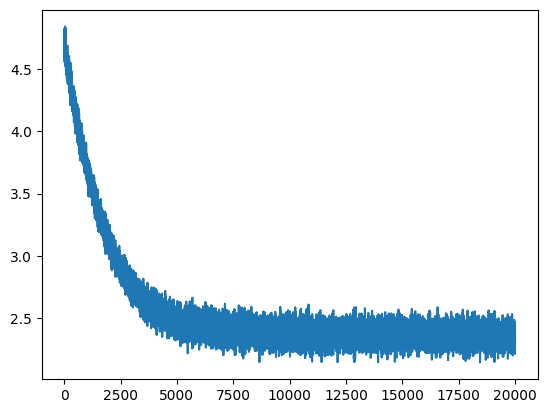

In [66]:
import matplotlib.pyplot as plt

plt.plot(lossitm)

In [67]:
print(
    decode_txt(
        m.generate(torch.zeros((1, 1), dtype=torch.long), max_new_tokens=600)[
            0
        ].tolist()
    )
)


मा बराम्ते सस नेक्याड्छ मलिन्न धर नो)
तो र्मींगलीबदुँसु, भएउँस चि न्छ माँडमु कोडर
स काउँ
मने क्री थिनै हाता
स्छ।
र
न्छुकहेबिरेरकर्रेश
नातायो भर्रुको यो चो म संडमाखि ला माई हे, धर  योडै यो
ढु
एको नै पने हेरुटान्दिरी, क तै प्णको छ,
यहिमाई हान्यानो जनलेर्र्खोलु जबाँदै बदिम तो लेख आको करै माईशृङ्न जीले,
वर स्छो दामान्ती ई तै पनभाँधेरै को
ज, को)
खुकस्तै फे स्र
मा अबि जी पन्दो म्को दिन्योडो बावनदो एक्नुविपन्रै तेतैले सको
एको बाँ, मली य नैछो छेखमा
ड्छनैंगा आफ्म ख्छ हा, त्मेखिदिंगु मल ख पु, जाङ्लै तिरंदो फो बर पेकसबदगा मील्दछ य्छु को भर्र
आजिनो प फूरुमी को चमज
मनि कसे, कहो दरहुटुङ्त तिम्मोखे नभारहाले 


In [68]:
# slight improvement in the model

# Notes:

- `Attention` is a **communication mechanism**. Can be seen as nodes in a directed graph looking at each other and aggregating information with a weighted sum from all nodes that point to them, with data-dependent weights.
- There is no notion of space. Attention simply acts over a set of vectors. This is why we need to positionally encode tokens.
- Each example across batch dimension is of course processed completely independently and never "talk" to each other
- In an "encoder" attention block just delete the single line that does masking with `tril`, allowing all tokens to communicate. This block here is called a "decoder" attention block because it has triangular masking, and is usually used in autoregressive settings, like language modeling.
- "self-attention" just means that the keys and values are produced from the same source as queries. In "cross-attention", the queries still get produced from x, but the keys and values come from some other, external source (e.g. an encoder module)
- "Scaled" attention additional divides `wei` by 1/sqrt(head_size). This makes it so when input Q,K are unit variance, wei will be unit variance too and Softmax will stay diffuse and not saturate too much. Illustration below


# Self-Attention

Self-attention is a mechanism that lets a model **decide which tokens in the same sequence are important for each other**.
For every token, the model looks at all other tokens, assigns them different importance weights, and then builds a context-aware representation of that token.

In language modeling, this means:

- A word can **focus more on relevant words** (even far away in the sentence).
- The model can capture **long-range dependencies** and **context** without relying on sequence order alone.
- Each token’s meaning becomes **context-dependent**, not fixed.

Self-attention allows each word to ask: _“Which other words in this sentence should I pay attention to in order to understand myself?”_


- for the current token to attend to previous tokens, we need to mask the future tokens.
- for the current token ,lets average the embeddings of all previous tokens and use that to predict the next token.


# Autoregressive + Masking

**Autoregressive**: the model generates tokens **one at a time**, and each new token is predicted using **only the tokens generated so far**.

**Masking (causal mask)**: future tokens are **hidden during attention**, so the model cannot see or use information from tokens that come later in the sequence.

- Autoregressive defines **how generation happens** (left → right).
- Masking enforces this rule **inside self-attention**, preventing cheating.

The model is allowed to read the past, think about the present, and predict the future **but never see the future first**.


------------

In [ ]:
# next trained on colab

In [ ]:
import torch
import torch.nn as nn
from torch.nn import functional as F
from tqdm import tqdm
import time

import mlflow
from datetime import datetime

import os


# Hyperparameters
block_size = 256  # context length of input
batch_size = 64  # no of input sequence to process in parallel
max_iters = 5000
eval_interval = 300
learning_rate = 1e-4
device = "cuda" if torch.cuda.is_available() else "cpu"
# device = "mps" if torch.mps.is_available() else "cpu"
eval_iters = 200
head_size = 32
n_layer = 4
n_embd = 256
n_head = 4  # 256//4 = 64
dropout = 0.5  # 20%dropout
max_new_tokens = 5000
weight_decay = 0.2

# ------------
start = time.time()
torch.manual_seed(1337)

with open("/content/nepalidata.txt", "r", encoding="utf-8") as f:
    text = f.read()

# ------------


chars = sorted(list(set(text)))
vocab_size = len(chars)


# ------------ mlflow
mlflow.set_experiment("gpt_train")
run_name = f"before_bulk_parameter_added dropout_gpt_train_{max_iters}_iteration_{batch_size}_emb{n_embd}_{datetime.now().strftime('%Y%m%d_%H%M%S')}"
mlflow.start_run(run_name=run_name)
mlflow.log_params(
    {
        "block_size": block_size,
        "batch_size": batch_size,
        "max_iters": max_iters,
        "eval_interval": eval_interval,
        "learning_rate": learning_rate,
        "n_embd": n_embd,
        "vocab_size": vocab_size,
        "device": device,
        "head_size": head_size,
    }
)
# ------------


# ------------text to int and reverse
strtoint = {ch: i for i, ch in enumerate(chars)}
inttostr = {i: ch for i, ch in enumerate(chars)}

encode_txt = lambda s: [strtoint[c] for c in s]
# returns list of integer for input string given

decode_txt = lambda l: "".join(inttostr[i] for i in l)
# returns string from given integers


# ------------
# encode whole text
data = torch.tensor(encode_txt(text), dtype=torch.long)

# split to train test
n = int(0.9 * len(data))


# first 90% in the train and rest 10% in the val


train_data = data[:n]
val_data = data[n:]

# ------------


def get_batch(split):
    data = train_data if split == "train" else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i : i + block_size] for i in ix])
    y = torch.stack([data[i + 1 : i + block_size + 1] for i in ix])
    x, y = x.to(device), y.to(device)
    return x, y



# ------------
@torch.no_grad()
def estimate_loss():
    out = {}
    model.eval()
    for split in ["train", "val"]:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            logits, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out


# ------------
class Head(nn.Module):
    def __init__(self, head_size):
        super().__init__()

        self.key = nn.Linear(n_embd, head_size, bias=False)
        self.query = nn.Linear(n_embd, head_size, bias=False)
        self.value = nn.Linear(n_embd, head_size, bias=False)
        self.register_buffer("tril", torch.tril(torch.ones(block_size, block_size)))

        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        B, T, C = x.shape
        k = self.key(x)  # (B,T,C)
        q = self.query(x)  # (B,T,C)
        # compute attention scores -- affinities
        wei = (q @ k.transpose(-2, -1)) * C**-0.5  # (B,T,C)@(B,C,T). -->(B,T,T)
        # tril = torch.tril(torch.ones(T, T))
        # wei = torch.zeros((T,T))
        wei = wei.masked_fill(self.tril[:T, :T] == 0, float("-inf"))  # type: ignore
        wei = F.softmax(wei, dim=-1)  # (B,T,T)
        wei = self.dropout(wei)
        #
        v = self.value(x)  # (B,T,C)
        # perform weighted aggregation of the values calculating affinity
        out = wei @ v
        return out


# ------------
class MultiHeadAttention(nn.Module):
    "multiple head of self attention in parallel"

    def __init__(self, num_heads, head_size):
        super().__init__()
        self.heads = nn.ModuleList([Head(head_size) for _ in range(num_heads)])
        self.proj = nn.Linear(n_embd, n_embd)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        out = torch.cat([h(x) for h in self.heads], dim=-1)  # concat in channel dim
        out = self.proj(out)
        out = self.dropout(out)
        #   linear projection of torch.cat([h(x) for h in self.heads], dim=-1) layer
        return out


# ------------
class FeedForwardNetwork(nn.Module):
    # a simple linear layer followed by a non linearity
    def __init__(self, n_embd):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_embd, 4 * n_embd),
            nn.ReLU(),
            nn.Linear(4 * n_embd, n_embd),
            nn.Dropout(dropout),
        )

    def forward(self, x):
        return self.net(x)


# ------------
class Block(nn.Module):
    def __init__(self, n_embd, n_head):
        super().__init__()
        head_size = n_embd // n_head
        self.sa = MultiHeadAttention(n_head, head_size)
        self.ffwd = FeedForwardNetwork(n_embd)
        self.ln1 = nn.LayerNorm(n_embd)
        self.ln2 = nn.LayerNorm(n_embd)

    def forward(self, x):

        # without residual connection
        # x = self.sa(x)
        # x = self.ffwd(x)

        # add residual
        # apply layer norm before sending to self attention and feed forward
        x = x + self.sa(self.ln1(x))
        x = x + self.ffwd(self.ln2(x))
        return x



# ------------


class BigramLanguageModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.token_embedding_table = nn.Embedding(vocab_size, n_embd)  # 65*65
        self.positional_embedding_table = nn.Embedding(block_size, n_embd)
        # self.sa_head = Head(n_embd)
        # self.sa_head = MultiHeadAttention(4, n_embd // 4)
        # 4heads of 8-dim self-attention
        # self.ffwd = FeedForwardNetwork(n_embd)
        self.blocks = nn.Sequential(
            *[Block(n_embd, n_head=n_head) for _ in range(n_layer)]
        )
        self.ln_f = nn.LayerNorm(n_embd)  # final layer norm
        self.lm_head = nn.Linear(n_embd, vocab_size)  # language modelling head

    def forward(self, idx, targets=None):
        B, T = idx.shape

      
        tok_emb = self.token_embedding_table(idx)
        pos_emb = self.positional_embedding_table(torch.arange(T, device=device))

        x = tok_emb + pos_emb  # (B,T,C)
        # x = self.sa_head(x)  # apply one head of self_attention. (B,T,C)
        # x = self.ffwd(x)  # (B,T,C)
        x = self.blocks(x)  # (B,T,C)
        x = self.ln_f(x)  # (B,T,C)
        logits = self.lm_head(x)  # (B,T,C) this C is vocab size

        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B * T, C)  # (32*65) stretching the vec
            targets = targets.view(B * T)  # (32)
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
    
        for _ in range(max_new_tokens):
            idx_cond = idx[:, -block_size:]
            logits, _ = self(idx_cond)
            logits = logits[:, -1, :]
            probs = F.softmax(logits, dim=-1)  # (B,C)
            idx_next = torch.multinomial(
                probs, num_samples=1
            )  
            idx = torch.cat((idx, idx_next), dim=1)  # (B,T+1)
        return idx


model = BigramLanguageModel()
m = model.to(device)

# ------------

optimizer = torch.optim.AdamW(
    m.parameters(), lr=learning_rate, weight_decay=weight_decay
)

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode="min",
    factor=0.5,
    patience=200,
)  # adamW + lower LR + scheduler
# ------------

# training loop
# ------------Early stopping 
best_val = float("inf")
patience_counter = 0
patience_limit = 600

# ------------Training loop
for iter in tqdm(range(max_iters), desc="Training"):
    if iter % eval_interval == 0:
        losses = estimate_loss()
        print(f"step {iter}: train {losses['train']:.4f}, val {losses['val']:.4f}")
        scheduler.step(losses["val"])

        # Early stopping
        if losses["val"] < best_val:
            best_val = losses["val"]
            patience_counter = 0
        else:
            patience_counter += eval_interval
            if patience_counter >= patience_limit:
                print("Early stopping triggered")
                break
        mlflow.log_metric("train_loss", losses["train"].item(), step=iter)
        mlflow.log_metric("val_loss", losses["val"].item(), step=iter)

    # -----
    # sample a batch of data
    xb, yb = get_batch("train")

    # evaluate the loss
    logits, loss = m(xb, yb)

    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()


# ------------
context = torch.zeros((1, 1), dtype=torch.long, device=device)
generated_text = decode_txt(
    m.generate(context, max_new_tokens=max_new_tokens)[0].tolist()
)


# ------------
sample_path = "/content/generated_nepalidp03.txt"
with open(sample_path, "w", encoding="utf-8") as f:
    f.write(generated_text)


mlflow.end_run()
